In [147]:
import pandas as pd
import json
import requests
import numpy as np
from geopy.geocoders import Nominatim, Here
from geopy.exc import GeocoderTimedOut
from ipykernel import kernelapp as app
from geopy import distance
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline 

- ad_id ‚Äì –∏–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä –æ–±—ä—è–≤–ª–µ–Ω–∏—è (—Ä–µ–∫–ª–∞–º—ã)
- xyz_campaign_id ‚Äì –∏–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä —Ä–µ–∫–ª–∞–º–Ω–æ–π –∫–∞–º–ø–∞–Ω–∏–∏ –≤ –±–∞–∑–µ –∫–æ–º–ø–∞–Ω–∏–∏ X
- fb_campaign_id ‚Äì –∏–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä –∫–∞–º–ø–∞–Ω–∏–∏ –≤ Facebook
- age ‚Äì –≤–æ–∑—Ä–∞—Å—Ç–Ω–∞—è –≥—Ä—É–ø–ø–∞, –∫–æ—Ç–æ—Ä–æ–π –ø–æ–∫–∞–∑—ã–≤–∞–ª–∞—Å—å —Ä–µ–∫–ª–∞–º–∞
- gender ‚Äì –ø–æ–ª —Ç–µ—Ö, –∫–æ–º—É –ø–æ–∫–∞–∑—ã–≤–∞–ª–∞—Å—å —Ä–µ–∫–ª–∞–º–∞
- interest ‚Äì–∫–æ–¥, —É–∫–∞–∑—ã–≤–∞—é—â–∏–π –∫–∞—Ç–µ–≥–æ—Ä–∏—é, –∫ –∫–æ—Ç–æ—Ä–æ–π –æ—Ç–Ω–æ—Å–∏—Ç—Å—è –∏–Ω—Ç–µ—Ä–µ—Å –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è (—Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–µ —á–∏—Å–ª–æ ‚Äì –∏–Ω—Ç–µ—Ä–µ—Å)
- impressions ‚Äì —á–∏—Å–ª–æ –ø–æ–∫–∞–∑–æ–≤
- clicks ‚Äì —á–∏—Å–ª–æ –∫–ª–∏–∫–æ–≤
- spent ‚Äì —Å—É–º–º–∞, –∫–æ—Ç–æ—Ä—É—é –∫–æ–º–ø–∞–Ω–∏—è –ø–æ—Ç—Ä–∞—Ç–∏–ª–∞ –Ω–∞ –ø–æ–∫–∞–∑ –æ–±—ä—è–≤–ª–µ–Ω–∏—è 
- total_conversion ‚Äì –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ª—é–¥–µ–π, –∫–æ—Ç–æ—Ä—ã–µ –∑–∞–∏–Ω—Ç–µ—Ä–µ—Å–æ–≤–∞–ª–∏—Å—å –ø—Ä–æ–¥—É–∫—Ç–æ–º –ø–æ—Å–ª–µ –ø—Ä–æ—Å–º–æ—Ç—Ä–∞ —Ä–µ–∫–ª–∞–º—ã
- approved_conversion ‚Äì –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ª—é–¥–µ–π, –∫–æ—Ç–æ—Ä—ã–µ –∫—É–ø–∏–ª–∏ –ø—Ä–æ–¥—É–∫—Ç –ø–æ—Å–ª–µ –ø—Ä–æ—Å–º–æ—Ç—Ä–∞ —Ä–µ–∫–ª–∞–º—ã

In [3]:
data = pd.read_csv('data_lessons/conversion.csv', sep = ',')

In [4]:
data.head()

ad_id  xyz_campaign_id  fb_campaign_id    age gender  interest  \
0  708746              916          103916  30-34      M        15   
1  708749              916          103917  30-34      M        16   
2  708771              916          103920  30-34      M        20   
3  708815              916          103928  30-34      M        28   
4  708818              916          103928  30-34      M        28   

   Impressions  Clicks  Spent  Total_Conversion  Approved_Conversion  
0         7350       1   1.43                 2                    1  
1        17861       2   1.82                 2                    0  
2          693       0   0.00                 1                    0  
3         4259       1   1.25                 1                    0  
4         4133       1   1.29                 1                    1

In [5]:
len(data['xyz_campaign_id'].drop_duplicates())

3

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


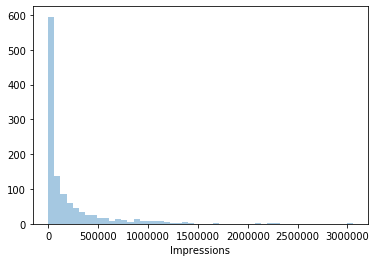

In [9]:
sns.distplot(data.Impressions, kde=False)

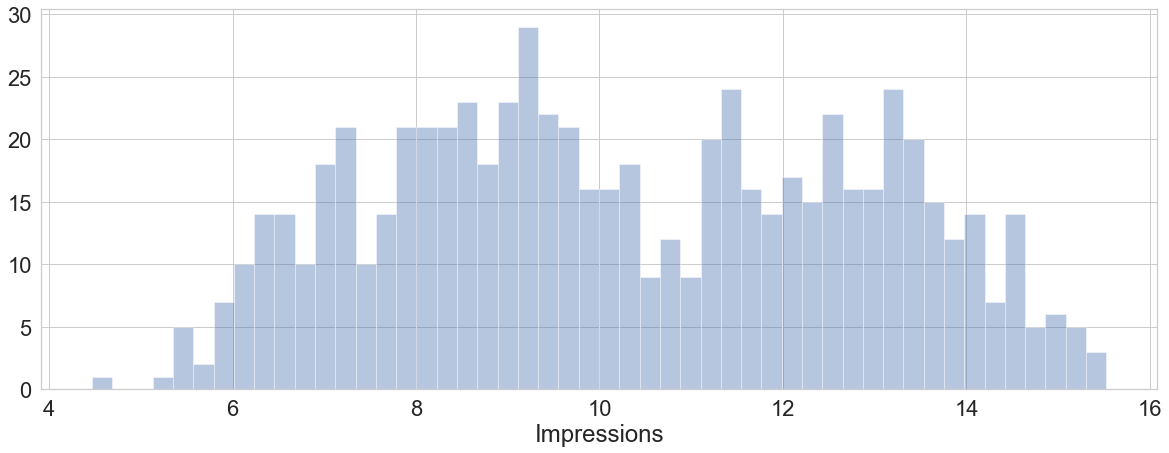

In [14]:
sns.distplot(np.log(data.groupby('fb_campaign_id').Impressions.sum()), kde=False, bins = 50)

In [196]:
#–æ–±—â–∏–µ –Ω–∞—Å—Ç—Ä–æ–π–∫–∏ –≥—Ä–∞—Ñ–∏–∫–∞
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )

In [15]:
data['ctr'] = data['Clicks']/data['Impressions']

In [16]:
data['ctr'].describe()

count    1143.000000
mean        0.000164
std         0.000115
min         0.000000
25%         0.000100
50%         0.000160
75%         0.000234
max         0.001059
Name: ctr, dtype: float64

In [18]:
data[(data['ctr'] == data['ctr'].max())]

ad_id  xyz_campaign_id  fb_campaign_id    age gender  interest  \
150  738637              936          109857  45-49      F        24   

     Impressions  Clicks  Spent  Total_Conversion  Approved_Conversion  \
150          944       1   1.42                 1                    0   

          ctr  
150  0.001059

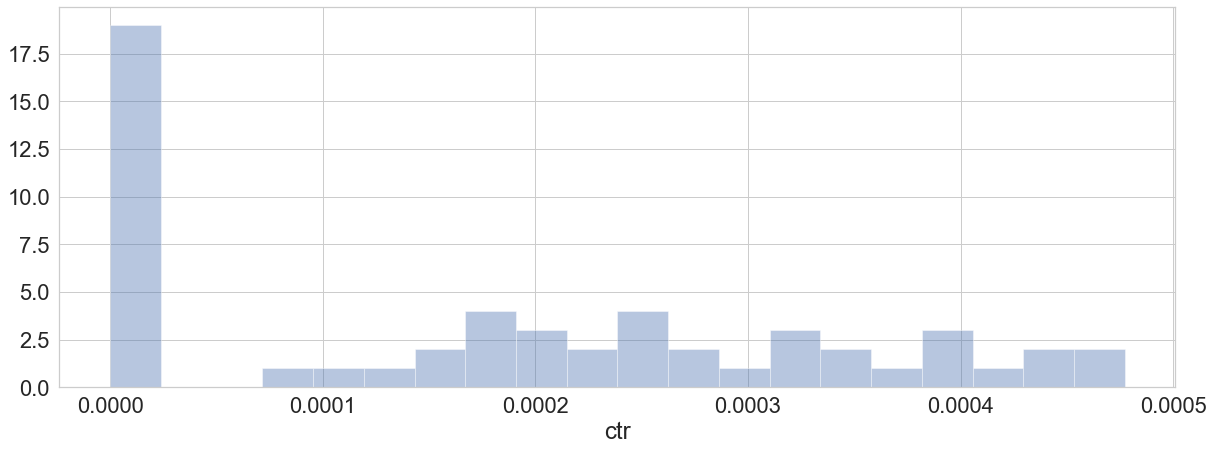

In [26]:
sns.distplot(data.query("xyz_campaign_id == 916").ctr, kde=False, bins = 20)

In [27]:
data['clicksspent'] = data['Spent']/data['Clicks']

In [28]:
data['clicksspent'].describe()

count    936.000000
mean       1.499347
std        0.232879
min        0.180000
25%        1.390000
50%        1.498273
75%        1.644364
max        2.212000
Name: clicksspent, dtype: float64

In [30]:
#–º–µ–∂–∫–≤–∞—Ä—Ç–∏–ª—å–Ω—ã–π —Ä–∞–∑–º–∞—Ö
from scipy.stats import iqr
iqr(data['clicksspent'], nan_policy='omit')

0.2543636990499998

In [32]:
data['age'].drop_duplicates()

0     30-34
18    35-39
27    40-44
32    45-49
Name: age, dtype: object

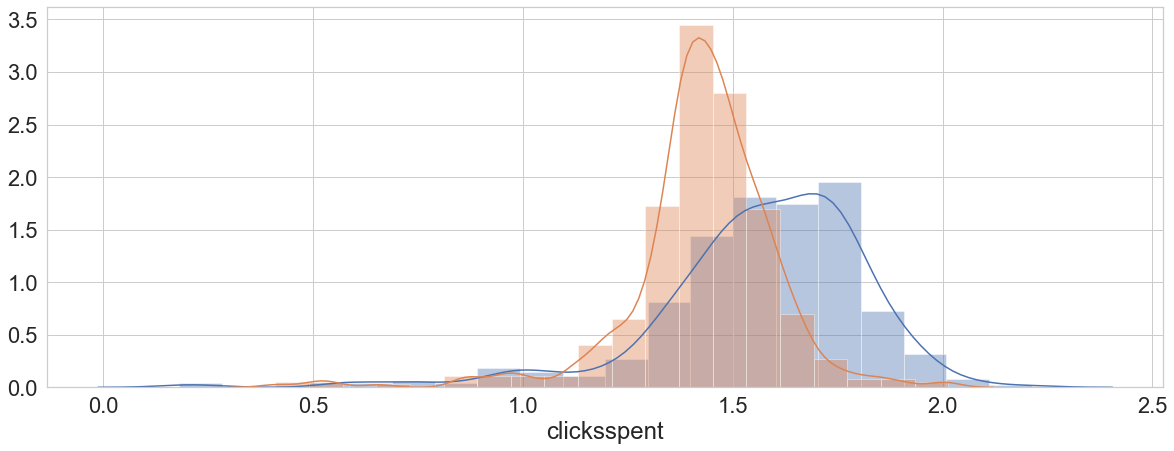

In [33]:
sns.distplot(data.query("gender == 'M'").clicksspent.dropna(), bins = 20)
sns.distplot(data.query("gender == 'F'").clicksspent.dropna(), bins = 20)

In [34]:
data['cc'] = data['Approved_Conversion']/data['Clicks']

In [36]:
data.query("ad_id == 1121814")

ad_id  xyz_campaign_id  fb_campaign_id    age gender  interest  \
860  1121814             1178          144659  30-34      F        27   

     Impressions  Clicks       Spent  Total_Conversion  Approved_Conversion  \
860      2223278     421  612.300003                38                   13   

          ctr  clicksspent        cc  
860  0.000189     1.454394  0.030879

# –£—Ä–æ–∫ 3

In [57]:
data = pd.read_csv('data_lessons/london.csv', sep = ',', parse_dates = ['timestamp'])

In [41]:
data.head()

timestamp  cnt   t1   t2    hum  wind_speed  weather_code  \
0 2015-01-04 00:00:00  182  3.0  2.0   93.0         6.0           3.0   
1 2015-01-04 01:00:00  138  3.0  2.5   93.0         5.0           1.0   
2 2015-01-04 02:00:00  134  2.5  2.5   96.5         0.0           1.0   
3 2015-01-04 03:00:00   72  2.0  2.0  100.0         0.0           1.0   
4 2015-01-04 04:00:00   47  2.0  0.0   93.0         6.5           1.0   

   is_holiday  is_weekend  season  
0         0.0         1.0     3.0  
1         0.0         1.0     3.0  
2         0.0         1.0     3.0  
3         0.0         1.0     3.0  
4         0.0         1.0     3.0

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  float64       
 7   is_holiday    17414 non-null  float64       
 8   is_weekend    17414 non-null  float64       
 9   season        17414 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 1.3 MB


In [44]:
data.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

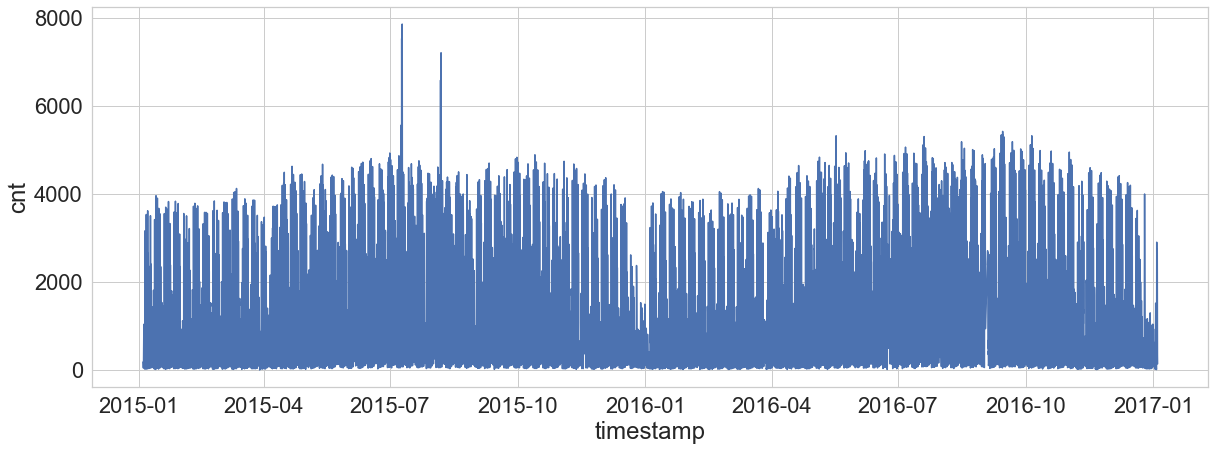

In [45]:
sns.lineplot(x = data.timestamp , y = data.cnt)

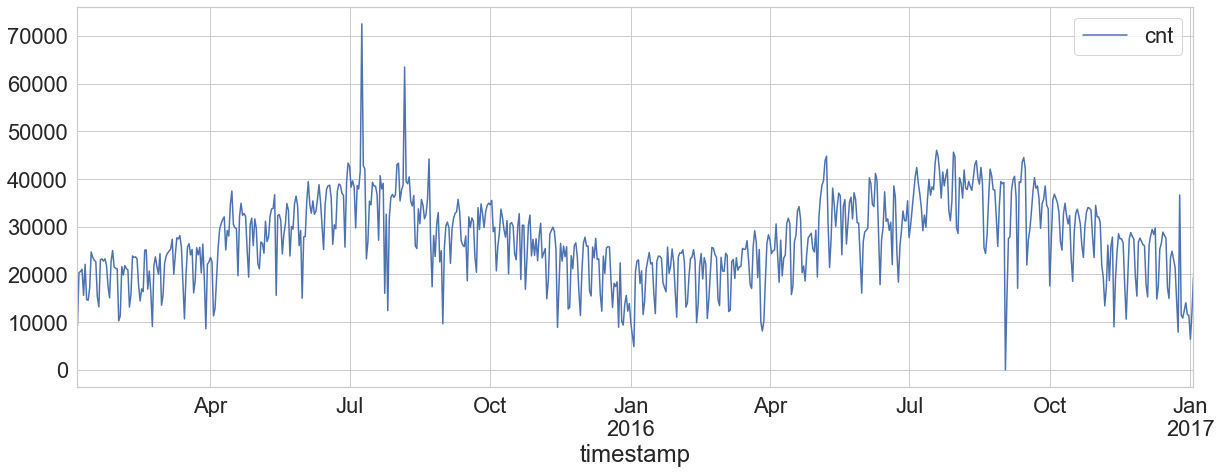

In [62]:
#–≤—ã–≤–µ–¥–µ–º —Å—É–º–º—É –ø–æ –¥–Ω—è–º
data.set_index('timestamp', drop = False, inplace = True) 
data.resample(rule='D').agg({'cnt':'sum'}).plot()

–ò—Ç–∞–∫, –≤—ã –æ–±–Ω–∞—Ä—É–∂–∏–ª–∏ –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–µ –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ —Å–∫–∞—á–∫–∏. –î–∞–≤–∞–π—Ç–µ –ø—Ä–æ–≤–µ—Ä–∏–º, —á—Ç–æ –∂–µ –º–æ–≥–ª–æ –ø—Ä–æ–∏–∑–æ–π—Ç–∏ –≤ —Ç–æ—Ç –¥–µ–Ω—å ü§î.

–î–ª—è —ç—Ç–æ–≥–æ —Ä–∞–∑–¥–µ–ª–∏–º –¥–∞–ª—å–Ω–µ–π—à–∏–µ –¥–µ–π—Å—Ç–≤–∏—è –Ω–∞ –Ω–µ—Å–∫–æ–ª—å–∫–æ —ç—Ç–∞–ø–æ–≤:

- —Å–Ω–∞—á–∞–ª–∞ –ø–æ—Å—á–∏—Ç–∞–µ–º —Å–∫–æ–ª—å–∑—è—â–µ–µ —Å—Ä–µ–¥–Ω–µ–µ, —á—Ç–æ–±—ã —Å–≥–ª–∞–¥–∏—Ç—å —Ä—è–¥
- –¥–∞–ª–µ–µ ‚Äì —Ä–∞–∑–Ω–∏—Ü—É –º–µ–∂–¥—É –Ω–∞–±–ª—é–¥–∞–µ–º—ã–º–∏ –∏ —Å–≥–ª–∞–∂–µ–Ω–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏
- –æ–ø—Ä–µ–¥–µ–ª–∏–º –≤–µ—Ä—Ö–Ω–∏–µ –∏ –Ω–∏–∂–Ω–∏–µ –≥—Ä–∞–Ω–∏—Ü—ã 99% –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω–æ–≥–æ –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞ 
- –Ω–∞–π–¥–µ–º –ø—Ä–∏—á–∏–Ω—ã –∞–Ω–æ–º–∞–ª–∏–π! \
–ù–∞ –¥–∞–Ω–Ω–æ–º —à–∞–≥–µ –≤–æ–∑—å–º–∏—Ç–µ –∞–≥—Ä–µ–≥–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –ø–æ –¥–Ω—è–º —Å –ø—Ä–µ–¥—ã–¥—É—â–µ–≥–æ —à–∞–≥–∞ –∏ –ø–æ—Å—á–∏—Ç–∞–π—Ç–µ —Å–∫–æ–ª—å–∑—è—â–µ–µ —Å—Ä–µ–¥–Ω–µ–µ —Å –æ–∫–Ω–æ–º 3. –í –∫–∞—á–µ—Å—Ç–≤–µ –æ—Ç–≤–µ—Ç–∞ —É–∫–∞–∂–∏—Ç–µ –ø–æ–ª—É—á–µ–Ω–Ω–æ–µ —á–∏—Å–ª–æ –∞—Ä–µ–Ω–¥ –∑–∞ 2015-07-09, –æ–∫—Ä—É–≥–ª–∏–≤ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–æ —Ü–µ–ª–æ–≥–æ.

In [83]:
#—Å–∫–æ–ª—å–∑—è—â–µ–µ —Å—Ä–µ–¥–Ω–µ–µ
b = data.resample(rule='D').agg({'cnt':'sum'}).rolling(window=3).mean() 
b

cnt
timestamp               
2015-01-04           NaN
2015-01-05           NaN
2015-01-06  16739.666667
2015-01-07  20683.000000
2015-01-08  19092.666667
...                  ...
2016-12-30  12682.000000
2016-12-31  12347.333333
2017-01-01   9803.666667
2017-01-02   9889.333333
2017-01-03  12560.000000

[731 rows x 1 columns]

In [84]:
b.loc['2015-07-09']

cnt    50705.0
Name: 2015-07-09 00:00:00, dtype: float64

In [82]:
#—Ä–∞–∑–Ω–∏—Ü–∞ –º–µ–∂–¥—É —Å–∫–æ–ª—å–∑—è—â–∏–º –∏ —Ñ–∞–∫—Ç–æ–º
a = data.resample(rule='D').agg({'cnt':'sum'}).rolling(window=3).mean() \
            -data.resample(rule='D').agg({'cnt':'sum'})
a

cnt
timestamp              
2015-01-04          NaN
2015-01-05          NaN
2015-01-06 -3873.333333
2015-01-07  -381.000000
2015-01-08  3491.666667
...                 ...
2016-12-30  1116.000000
2016-12-31   923.333333
2017-01-01  3382.666667
2017-01-02 -1933.666667
2017-01-03 -6876.000000

[731 rows x 1 columns]

In [94]:
std = np.std(data.resample(rule='D').agg({'cnt':'sum'}) - \
    data.resample(rule='D').agg({'cnt':'sum'}).rolling(window=3).mean())
np.round(std,2)

cnt    4558.59
dtype: float64

In [103]:
upper = data.resample(rule='D').agg({'cnt':'sum'}).rolling(window=3).mean() + 2.576*std
low = data.resample(rule='D').agg({'cnt':'sum'}).rolling(window=3).mean() - 2.576*std

In [104]:
upper

cnt
timestamp               
2015-01-04           NaN
2015-01-05           NaN
2015-01-06  28482.585854
2015-01-07  32425.919188
2015-01-08  30835.585854
...                  ...
2016-12-30  24424.919188
2016-12-31  24090.252521
2017-01-01  21546.585854
2017-01-02  21632.252521
2017-01-03  24302.919188

[731 rows x 1 columns]

In [107]:
c = data.resample(rule='D').agg({'cnt':'sum'})
c['low'] = low
c['upper'] = upper

In [113]:
#–≤—ã–≤–æ–¥–∏–º –∑–Ω–∞—á–µ–Ω–∏—è –≤—ã—à–µ –≤–µ—Ä—Ö–Ω–µ–≥–æ –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞
c[c['cnt'] > c['upper']]

cnt           low         upper
timestamp                                    
2015-07-09  72504  38962.080812  62447.919188
2015-08-06  63468  34884.414146  58370.252521
2016-09-04  27512   2516.080812  26001.919188
2016-12-25  36653   7907.747479  31393.585854

In [116]:
data = pd.read_csv('data_lessons/experiment_lesson_4.csv', sep = ',')

In [117]:
data.head()

order_id  delivery_time  district experiment_group
0      3159           44.0  Purlieus          control
1     10426           51.0  Purlieus          control
2      9155           46.0  Purlieus          control
3     10699           34.0  Purlieus          control
4     10061           43.0  Purlieus          control

district
Central     AxesSubplot(0.125,0.125;0.775x0.755)
Purlieus    AxesSubplot(0.125,0.125;0.775x0.755)
Suburb      AxesSubplot(0.125,0.125;0.775x0.755)
Name: delivery_time, dtype: object

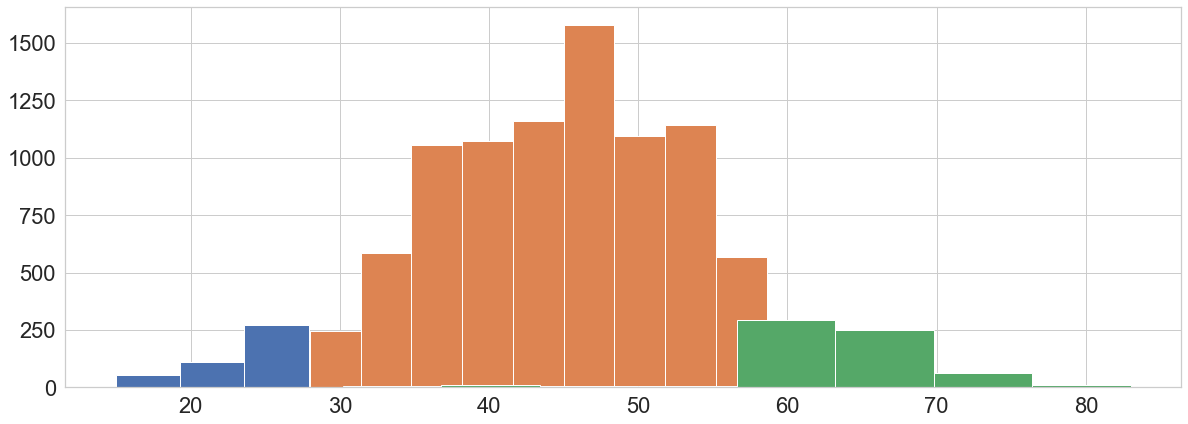

In [123]:
data.query("experiment_group == 'control'").groupby(['district']).delivery_time.hist()

In [124]:
#—Å—á–∏—Ç–∞–µ–º —É–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è
data.groupby(['experiment_group']).agg({'order_id': pd.Series.nunique})

order_id
experiment_group          
control              10092
test                 10104

In [126]:
abs(10104-10092)

12

# Normal distribution research  \
–¢–µ—Å—Ç –®–∞–ø–∏—Ä–æ-–£–∏–ª–∫–∞

In [129]:
data[data['experiment_group'] == 'test']['delivery_time'].sample(1000, random_state=17)

17877    37.0
18499    39.0
16476    48.0
14602    30.0
16719    25.0
         ... 
12410    40.0
18882    47.0
15944    47.0
14618    41.0
18816    36.0
Name: delivery_time, Length: 1000, dtype: float64

In [154]:
x = data[data['experiment_group'] == 'test']['delivery_time'].sample(1000, random_state=17).mean()
std = np.std(data[data['experiment_group'] == 'test']['delivery_time'].sample(1000, random_state=17))

In [155]:
std

10.065119919802246

In [150]:
#–®–∞–ø–∏—Ä–æ-–£–∏–ª–∫ - –µ—Å–ª–∏ —Ä value <0.05 - –ø—Ä–∏–Ω–∏–º–∞–µ–º –ù1 –æ –Ω–µ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–∏
shapiro_test = stats.shapiro(data[data['experiment_group'] == 'test']['delivery_time'].sample(1000, random_state=17))

In [152]:
shapiro_test

(0.9975479245185852, 0.14013493061065674)

In [157]:
#t-test - –µ—Å–ª–∏ —Ä value <0.05 - –ø—Ä–∏–Ω–∏–º–∞–µ–º –ù1 –æ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã—Ö –æ—Ç–ª–∏—á–∏—è—Ö —Å—Ä–µ–¥–Ω–∏—Ö
stats.ttest_ind(data[data['experiment_group'] == 'test']['delivery_time'],
                     data[data['experiment_group'] == 'control']['delivery_time'])

Ttest_indResult(statistic=-43.03582663183714, pvalue=0.0)

In [158]:
data[data['experiment_group'] == 'test']['delivery_time'].mean()

39.04681314330958

In [159]:
data[data['experiment_group'] == 'control']['delivery_time'].mean()

45.065101070154576

In [161]:
data[data['experiment_group'] == 'test']['delivery_time'].mean()/data[data['experiment_group'] == 'control']['delivery_time'].mean()-1

-0.1335465312166081

# –î–∏—Å–ø–µ—Ä—Å–∏–æ–Ω–Ω—ã–π –∞–Ω–∞–ª–∏–∑

- scipy - –≤ –º–æ–¥—É–ª–µ stats –º–Ω–æ–≥–æ —Ä–∞–∑–ª–∏—á–Ω—ã—Ö —Å—Ç–∞—Ç —Ç–µ—Å—Ç–æ–≤ –∏ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–π
- statsmodels - –º–Ω–æ–≥–æ –º–æ–¥–µ–ª–µ–π

In [177]:
data = pd.read_csv('data_lessons/5_task_1.csv', sep = ',')

In [165]:
data2 = pd.read_csv('data_lessons/5_task_2.csv', sep = ',')

5_task_1: 
- id ‚Äì id –∫–ª–∏–µ–Ω—Ç–∞ –≤ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–µ
- group ‚Äì –≤ –∫–∞–∫–æ–º —Ä–∞–∑—Ä–µ—à–µ–Ω–∏–∏ –ø–æ–∫–∞–∑—ã–≤–∞–ª–∏—Å—å –∫–∞—Ä—Ç–∏–Ω–∫–∏ (A ‚Äì –ø—Ä—è–º–æ—É–≥–æ–ª—å–Ω—ã–µ 16:9, B ‚Äì –∫–≤–∞–¥—Ä–∞—Ç–Ω—ã–µ, C ‚Äì –ø—Ä—è–º–æ—É–≥–æ–ª—å–Ω—ã–µ 12:4)
- events ‚Äì —Å–∫–æ–ª—å–∫–æ –±–ª—é–¥ —Å—É–º–º–∞—Ä–Ω–æ –±—ã–ª–æ –∑–∞–∫–∞–∑–∞–Ω–æ –∑–∞ –ø–µ—Ä–∏–æ–¥

5_task_2:
- id ‚Äì id –∫–ª–∏–µ–Ω—Ç–∞ –≤ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–µ
- segment ‚Äì —Å–µ–≥–º–µ–Ω—Ç (high/low)
- group ‚Äì –≤–∏–¥ –∫–Ω–æ–ø–∫–∏ (control ‚Äì —Å—Ç–∞—Ä–∞—è –≤–µ—Ä—Å–∏—è, test ‚Äì –Ω–æ–≤–∞—è –≤–µ—Ä—Å–∏—è)
- events ‚Äì —Å–∫–æ–ª—å–∫–æ –±–ª—é–¥ —Å—É–º–º–∞—Ä–Ω–æ –±—ã–ª–æ –∑–∞–∫–∞–∑–∞–Ω–æ –∑–∞ –ø–µ—Ä–∏–æ–¥

In [166]:
data.head()

id group  events
0  16046     A      14
1  18712     A      41
2   3268     A      30
3  22633     A      37
4  28071     A      38

In [167]:
data2.head()

id group segment  events
0  83440  test    high    78.0
1  96723  test    high    71.0
2  68719  test    high    80.0
3  50399  test    high    80.0
4  95613  test    high    78.0

–ü—Ä–æ–≤–µ—Ä—å—Ç–µ, —è–≤–ª—è—é—Ç—Å—è –ª–∏ –¥–∏—Å–ø–µ—Ä—Å–∏–∏ –≤–Ω—É—Ç—Ä–∏ –≥—Ä—É–ø–ø –ø—Ä–∏–º–µ—Ä–Ω–æ –æ–¥–∏–Ω–∞–∫–æ–≤—ã–º–∏ (–≥–æ–º–æ–≥–µ–Ω–Ω—ã–º–∏) —Å –ø–æ–º–æ—â—å—é —Ç–µ—Å—Ç–∞ –õ–µ–≤–µ–Ω–∞.

In [169]:
stats.levene(data.query("group == 'A'")['events'],
                  data.query("group == 'B'")['events'],
                  data.query("group == 'C'")['events'])

LeveneResult(statistic=2.2622596339318037, pvalue=0.1041327199523974)

In [ ]:
#pvalue > 0.05 - –Ω–µ –æ—Ç–∫–ª–æ–Ω—è–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É

In [170]:
#–¥–ª—è –∏–Ω—Ç–µ—Ä–µ—Å–∞ —Å—Ä–∞–≤–Ω–∏–º —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏—è
print(np.std(data.query("group == 'A'")['events']))
print(np.std(data.query("group == 'B'")['events']))
print(np.std(data.query("group == 'C'")['events']))

10.07887215118834
9.84786753769567
9.958549990334886


In [172]:
#–®–∞–ø–∏—Ä–æ-–£–∏–ª–∫ –Ω–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—å
print(stats.shapiro(data[data['group'] == 'A']['events'].sample(1000, random_state=17)))
print(stats.shapiro(data[data['group'] == 'B']['events'].sample(1000, random_state=17)))
print(stats.shapiro(data[data['group'] == 'C']['events'].sample(1000, random_state=17)))

(0.9973153471946716, 0.09609563648700714)
(0.9980798363685608, 0.31768906116485596)
(0.9981185793876648, 0.3359004259109497)


In [ ]:
#pvalue > 0.05 - –Ω–µ –æ—Ç–∫–ª–æ–Ω—è–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É - –≤—Å–µ –≥—Ä—É–ø–ø—ã –Ω–æ—Ä–º–∞–ª—å–Ω–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω—ã

### –¥–ª—è –æ–¥–Ω–æ—Ñ–∞–∫—Ç–æ—Ä–Ω–æ–≥–æ –¥–∏—Å–ø–µ—Ä—Å–∏–æ–Ω–Ω–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞ –∏—Å–ø–æ–ª—å–∑—É—é—Ç stats.f_oneway

In [178]:
stats.f_oneway(data[data['group'] == 'A']['events'],
            data[data['group'] == 'B']['events'],
            data[data['group'] == 'C']['events'])

F_onewayResult(statistic=2886.166657438961, pvalue=0.0)

In [182]:
from statsmodels.stats import multicomp

In [201]:
multicomp.pairwise_tukeyhsd(data['events'],groups = data['group']).summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [ ]:
#reject = True - –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ —Ä–∞–∑–ª–∏—á–∏—è –º–µ–∂–¥—É –≥—Ä—É–ø–ø–∞–º–∏ –∑–Ω–∞—á–∏–º—ã–µ

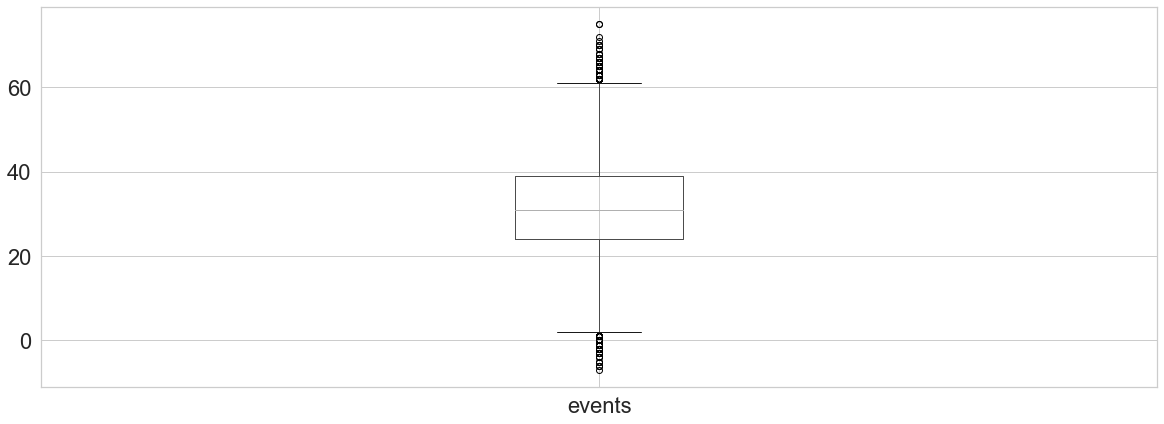

In [203]:
data[['events']].boxplot()

In [205]:
print(data[data['group'] == 'A']['events'].mean())
print(data[data['group'] == 'B']['events'].mean())
print(data[data['group'] == 'C']['events'].mean())

29.5796
37.6136
27.4703


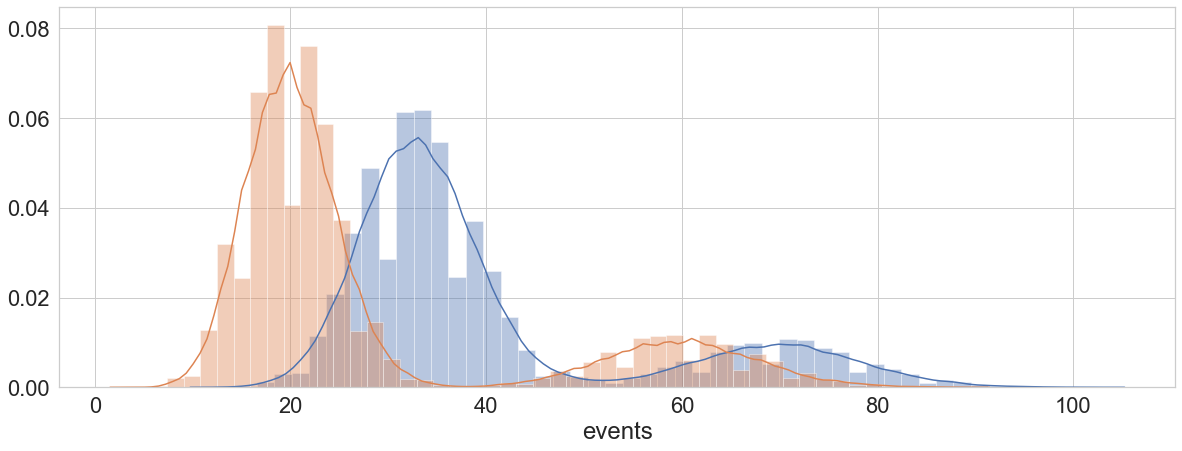

In [207]:
sns.distplot(data2.query("group == 'test'").events)
sns.distplot(data2.query("group == 'control'").events)

In [210]:
data2.groupby(['group','segment']).events.describe()

count       mean       std   min   25%   50%   75%    max
group   segment                                                             
control high     10000.0  59.970800  7.805347  31.0  55.0  60.0  65.0   89.0
        low      40000.0  20.031575  4.473576   4.0  17.0  20.0  23.0   41.0
test    high     10000.0  69.938500  8.403974  40.0  64.0  70.0  76.0  102.0
        low      40000.0  33.025925  5.720845  13.0  29.0  33.0  37.0   59.0

### –ø—Ä–æ–≤–µ—Ä–∏–º –≤–ª–∏—è–Ω–∏–µ group , segment –Ω–∞ events —Å –æ–ø–º–æ—â—å—é –º–Ω–æ–≥–æ—Ñ–∞–∫—Ç–æ—Ä–Ω–æ–≥–æ –¥–∏—Å–ø–µ—Ä—Å–∏–æ–Ω–Ω–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞
events ~ segment + group + segment:group

In [211]:
moore_lm = ols('events ~ segment + group + segment:group',
                data=data2).fit()
table = sm.stats.anova_lm(moore_lm, typ=2) # Type 2 Anova DataFrame
print(table)

                     sum_sq       df              F         PR(>F)
segment        2.362480e+07      1.0  689756.377485   0.000000e+00
group          3.837195e+06      1.0  112031.864119   0.000000e+00
segment:group  3.664244e+04      1.0    1069.823273  2.060261e-233
Residual       3.424956e+06  99996.0            NaN            NaN


In [216]:
data2['combination'] = data2.group + '/' + data2.segment

In [217]:
data2

id    group segment  events  combination
0      83440     test    high    78.0    test/high
1      96723     test    high    71.0    test/high
2      68719     test    high    80.0    test/high
3      50399     test    high    80.0    test/high
4      95613     test    high    78.0    test/high
...      ...      ...     ...     ...          ...
99995  60695  control     low    15.0  control/low
99996   5934  control     low    16.0  control/low
99997  30046  control     low    22.0  control/low
99998  26474  control     low    21.0  control/low
99999  42649  control     low    23.0  control/low

[100000 rows x 5 columns]

In [218]:
#–°—Ç–æ–ª–±–µ—Ü meandiff –æ—Ç—Ä–∞–∂–∞–µ—Ç —Ä–∞–∑–ª–∏—á–∏–µ –≤ —Å—Ä–µ–¥–Ω–∏—Ö –º–µ–∂–¥—É –≤—Ç–æ—Ä–æ–π –∏ –ø–µ—Ä–≤–æ–π –≥—Ä—É–ø–ø–æ–πs
multicomp.pairwise_tukeyhsd(data2['events'],groups = data2['combination']).summary()

<class 'statsmodels.iolib.table.SimpleTable'>

### –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤

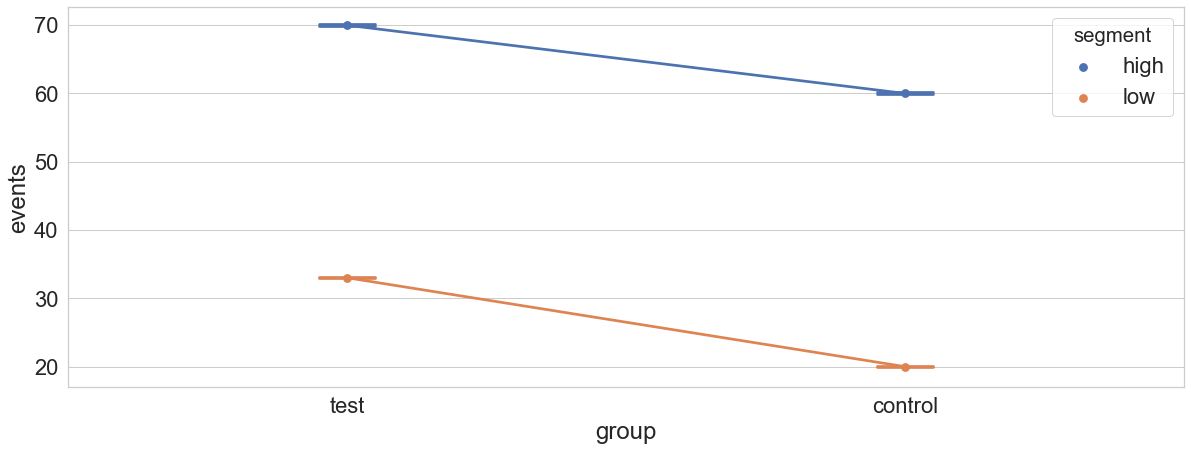

In [224]:
#hue - –≤—ã–≤–æ–¥ –æ–¥–Ω–æ–≥–æ –∏–∑ —Ñ–∞–∫—Ç–æ—Ä–æ–≤
sns.pointplot(x = 'group', y = 'events', hue = 'segment', data = data2, capsize = .1)

# Regression

–ü–æ–ª–µ–∑–Ω—ã–µ —Å—Å—ã–ª–∫–∏:

–õ—É—á—à–µ –æ–±—ã—á–Ω–æ–π –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏:
https://minepy.readthedocs.io/en/latest/

–ö–≤–∞—Ä—Ç–µ—Ç —ç–Ω—Å–∫–æ–º–±–∞: (–¥–ª—è –æ–±—â–µ–≥–æ –ø–æ–Ω–∏–º–∞–Ω–∏—è)
https://www.autodesk.com/research/publications/same-stats-different-graphs

–î–∏–∞–≥–Ω–æ—Å—Ç–∏–∫–∞ –º–æ–¥–µ–ª–∏:
https://www.statsmodels.org/dev/examples/notebooks/generated/regression_diagnostics.html

–í–∏–∑—É–∞–ª—å–Ω–∞—è –¥–∏–∞–≥–Ω–æ—Å—Ç–∏–∫–∞:
https://zhiyzuo.github.io/Linear-Regression-Diagnostic-in-Python/


sns.set(style='whitegrid', rc={'figure.figsize' : (10,5)}) 
sns.regplot(x = 'sepal_length', y = 'sepal_width', data = iris)
plt.title('–í–∑–∞–∏–º–æ—Å–≤—è–∑—å –∏–∑–º–µ—Ä–µ–Ω–∏–π —á–∞—à–µ–ª–∏—Å—Ç–Ω–∏–∫–æ–≤ –∏—Ä–∏—Å–æ–≤')
plt.xlabel('–î–ª–∏–Ω–∞ —á–∞—à–µ–ª–∏—Å—Ç–Ω–∏–∫–∞')
plt.ylabel('–®–∏—Ä–∏–Ω–∞ —á–∞—à–µ–ª–∏—Å—Ç–Ω–∏–∫–∞')

In [226]:
data = pd.read_csv('data_lessons/cars.csv')

In [227]:
data.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [228]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [236]:
data['CarName'] = data['CarName'].apply(lambda x: x.split(' ')[0]) 

In [237]:
data['CarName'].head()

0    alfa-romero
1    alfa-romero
2    alfa-romero
3           audi
4           audi
Name: CarName, dtype: object

In [239]:
len(data['CarName'].drop_duplicates())

28

'maxda' ‚Üí 'mazda'
'Nissan' ‚Üí 'nissan'
'porcshce' ‚Üí 'porsche'
'toyouta' ‚Üí 'toyota'
'vokswagen' & 'vw' ‚Üí 'volkswagen'

In [240]:
fact = ['maxda' ,'Nissan', 'porcshce' , 'toyouta', 'vokswagen', 'vw']
correct = ['mazda', 'nissan', 'porsche', 'toyota' , 'volkswagen', 'volkswagen']

In [241]:
for fact, correct in zip(fact,correct):
    data['CarName'] = data['CarName'].apply(lambda x: x.replace(fact, correct)) 

In [243]:
len(data['CarName'].drop_duplicates())

22

In [244]:
data.corr()

car_ID  symboling  wheelbase  carlength  carwidth  \
car_ID            1.000000  -0.151621   0.129729   0.170636  0.052387   
symboling        -0.151621   1.000000  -0.531954  -0.357612 -0.232919   
wheelbase         0.129729  -0.531954   1.000000   0.874587  0.795144   
carlength         0.170636  -0.357612   0.874587   1.000000  0.841118   
carwidth          0.052387  -0.232919   0.795144   0.841118  1.000000   
carheight         0.255960  -0.541038   0.589435   0.491029  0.279210   
curbweight        0.071962  -0.227691   0.776386   0.877728  0.867032   
enginesize       -0.033930  -0.105790   0.569329   0.683360  0.735433   
boreratio         0.260064  -0.130051   0.488750   0.606454  0.559150   
stroke           -0.160824  -0.008735   0.160959   0.129533  0.182942   
compressionratio  0.150276  -0.178515   0.249786   0.158414  0.181129   
horsepower       -0.015006   0.070873   0.353294   0.552623  0.640732   
peakrpm          -0.203789   0.273606  -0.360469  -0.287242 -0.220012   
citympg           0.015940  -0.035823  -0.470414  -0.670909 -0.642704   
highwaympg        0.011255   0.034606  -0.544082  -0.704662 -0.677218   
price            -0.109093  -0.079978   0.577816   0.682920  0.759325   

                  carheight  curbweight  enginesize  boreratio    stroke  \
car_ID             0.255960    0.071962   -0.033930   0.260064 -0.160824   
symboling         -0.541038   -0.227691   -0.105790  -0.130051 -0.008735   
wheelbase          0.589435    0.776386    0.569329   0.488750  0.160959   
carlength          0.491029    0.877728    0.683360   0.606454  0.129533   
carwidth           0.279210    0.867032    0.735433   0.559150  0.182942   
carheight          1.000000    0.295572    0.067149   0.171071 -0.055307   
curbweight         0.295572    1.000000    0.850594   0.648480  0.168790   
enginesize         0.067149    0.850594    1.000000   0.583774  0.203129   
boreratio          0.171071    0.648480    0.583774   1.000000 -0.055909   
stroke            -0.055307    0.168790    0.203129  -0.055909  1.000000   
compressionratio   0.261214    0.151362    0.028971   0.005197  0.186110   
horsepower        -0.108802    0.750739    0.809769   0.573677  0.080940   
peakrpm           -0.320411   -0.266243   -0.244660  -0.254976 -0.067964   
citympg           -0.048640   -0.757414   -0.653658  -0.584532 -0.042145   
highwaympg        -0.107358   -0.797465   -0.677470  -0.587012 -0.043931   
price              0.119336    0.835305    0.874145   0.553173  0.079443   

                  compressionratio  horsepower   peakrpm   citympg  \
car_ID                    0.150276   -0.015006 -0.203789  0.015940   
symboling                -0.178515    0.070873  0.273606 -0.035823   
wheelbase                 0.249786    0.353294 -0.360469 -0.470414   
carlength                 0.158414    0.552623 -0.287242 -0.670909   
carwidth                  0.181129    0.640732 -0.220012 -0.642704   
carheight                 0.261214   -0.108802 -0.320411 -0.048640   
curbweight                0.151362    0.750739 -0.266243 -0.757414   
enginesize                0.028971    0.809769 -0.244660 -0.653658   
boreratio                 0.005197    0.573677 -0.254976 -0.584532   
stroke                    0.186110    0.080940 -0.067964 -0.042145   
compressionratio          1.000000   -0.204326 -0.435741  0.324701   
horsepower               -0.204326    1.000000  0.131073 -0.801456   
peakrpm                  -0.435741    0.131073  1.000000 -0.113544   
citympg                   0.324701   -0.801456 -0.113544  1.000000   
highwaympg                0.265201   -0.770544 -0.054275  0.971337   
price                     0.067984    0.808139 -0.085267 -0.685751   

                  highwaympg     price  
car_ID              0.011255 -0.109093  
symboling           0.034606 -0.079978  
wheelbase          -0.544082  0.577816  
carlength          -0.704662  0.682920  
carwidth           -0.677218  0.759325  
carheight          -0.107358  0.119336  
curbwei

In [284]:
# data = data.drop(columns = ['car_ID'])
features = list(data[['CarName', 'fueltype', 'aspiration','carbody', 'drivewheel', 
                             'wheelbase', 'carlength','carwidth', 'curbweight', 
                             'enginetype', 'cylindernumber', 'enginesize', 'boreratio',
                             'horsepower']].columns)
itog_columns = []
for f in features:
    if str(data[f].dtype) == 'object':
        itog_columns.append(f)


In [257]:
itog_columns

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [260]:
data

symboling      CarName fueltype aspiration doornumber      carbody  \
0            3  alfa-romero      gas        std        two  convertible   
1            3  alfa-romero      gas        std        two  convertible   
2            1  alfa-romero      gas        std        two    hatchback   
3            2         audi      gas        std       four        sedan   
4            2         audi      gas        std       four        sedan   
..         ...          ...      ...        ...        ...          ...   
200         -1        volvo      gas        std       four        sedan   
201         -1        volvo      gas      turbo       four        sedan   
202         -1        volvo      gas        std       four        sedan   
203         -1        volvo   diesel      turbo       four        sedan   
204         -1        volvo      gas      turbo       four        sedan   

    drivewheel enginelocation  wheelbase  carlength  ...  enginesize  \
0          rwd          front       88.6      168.8  ...         130   
1          rwd          front       88.6      168.8  ...         130   
2          rwd          front       94.5      171.2  ...         152   
3          fwd          front       99.8      176.6  ...         109   
4          4wd          front       99.4      176.6  ...         136   
..         ...            ...        ...        ...  ...         ...   
200        rwd          front      109.1      188.8  ...         141   
201        rwd          front      109.1      188.8  ...         141   
202        rwd          front      109.1      188.8  ...         173   
203        rwd          front      109.1      188.8  ...         145   
204        rwd          front      109.1      188.8  ...         141   

     fuelsystem  boreratio stroke compressionratio  horsepower peakrpm  \
0          mpfi       3.47   2.68              9.0         111    5000   
1          mpfi       3.47   2.68              9.0         111    5000   
2          mpfi       2.68   3.47              9.0         154    5000   
3          mpfi       3.19   3.40             10.0         102    5500   
4          mpfi       3.19   3.40              8.0         115    5500   
..          ...        ...    ...              ...         ...     ...   
200        mpfi       3.78   3.15              9.5         114    5400   
201        mpfi       3.78   3.15              8.7         160    5300   
202        mpfi       3.58   2.87              8.8         134    5500   
203         idi       3.01   3.40             23.0         106    4800   
204        mpfi       3.78   3.15              9.5         114    5400   

     citympg  highwaympg    price  
0         21          27  13495.0  
1         21          27  16500.0  
2         19          26  16500.0  
3         24          30  13950.0  
4         18          22  17450.0  
..       ...         ...      ...  
200       23          28  16845.0  
201       19          25  19045.0  
202       18          23  21485.0  
203       26          27  22470.0  
204       19          25  22625.0  

[205 rows x 25 columns]

In [285]:
#—Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–∏—Ä—É–µ–º –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ –≤ –±–∏–Ω–∞—Ä–Ω—ã–µ
df_dummy = pd.get_dummies(data=data[['CarName', 'fueltype', 'aspiration','carbody', 'drivewheel', 
                             'wheelbase', 'carlength','carwidth', 'curbweight', 
                             'enginetype', 'cylindernumber', 'enginesize', 'boreratio',
                             'horsepower']][itog_columns], drop_first = True)

In [264]:
df_dummy

CarName_audi  CarName_bmw  CarName_buick  CarName_chevrolet  \
0               0            0              0                  0   
1               0            0              0                  0   
2               0            0              0                  0   
3               1            0              0                  0   
4               1            0              0                  0   
..            ...          ...            ...                ...   
200             0            0              0                  0   
201             0            0              0                  0   
202             0            0              0                  0   
203             0            0              0                  0   
204             0            0              0                  0   

     CarName_dodge  CarName_honda  CarName_isuzu  CarName_jaguar  \
0                0              0              0               0   
1                0              0              0               0   
2                0              0              0               0   
3                0              0              0               0   
4                0              0              0               0   
..             ...            ...            ...             ...   
200              0              0              0               0   
201              0              0              0               0   
202              0              0              0               0   
203              0              0              0               0   
204              0              0              0               0   

     CarName_mazda  CarName_mercury  ...  cylindernumber_three  \
0                0                0  ...                     0   
1                0                0  ...                     0   
2                0                0  ...                     0   
3                0                0  ...                     0   
4                0                0  ...                     0   
..             ...              ...  ...                   ...   
200              0                0  ...                     0   
201              0                0  ...                     0   
202              0                0  ...                     0   
203              0                0  ...                     0   
204              0                0  ...                     0   

     cylindernumber_twelve  cylindernumber_two  fuelsystem_2bbl  \
0                        0                   0                0   
1                        0                   0                0   
2                        0                   0                0   
3                        0                   0                0   
4                        0                   0                0   
..                     ...                 ...              ...   
200                      0                   0                0   
201                      0                   0                0   
202                      0                   0                0   
203                      0                   0                0   
204                      0                   0                0   

     fuelsystem_4bbl  fuelsystem_idi  fuelsystem_mfi  fuelsystem_mpfi  \
0                  0               0               0                1   
1                  0               0               0                1   
2                  0               0               0                1   
3                  0               0               0                1   
4                  0               0               0                1   
..               ...             ...             ...              ...   
200                0               0               0                1   
201                0               0               0                1   
202                0               0               0                1   
203                0               1       

In [286]:
data_itog = pd.concat([data[['CarName', 'fueltype', 'aspiration','carbody', 'drivewheel', 
                             'wheelbase', 'carlength','carwidth', 'curbweight', 
                             'enginetype', 'cylindernumber', 'enginesize', 'boreratio',
                             'horsepower']], df_dummy], axis=1)
data_itog.head()

CarName fueltype aspiration      carbody drivewheel  wheelbase  \
0  alfa-romero      gas        std  convertible        rwd       88.6   
1  alfa-romero      gas        std  convertible        rwd       88.6   
2  alfa-romero      gas        std    hatchback        rwd       94.5   
3         audi      gas        std        sedan        fwd       99.8   
4         audi      gas        std        sedan        4wd       99.4   

   carlength  carwidth  curbweight enginetype  ... enginetype_ohc  \
0      168.8      64.1        2548       dohc  ...              0   
1      168.8      64.1        2548       dohc  ...              0   
2      171.2      65.5        2823       ohcv  ...              0   
3      176.6      66.2        2337        ohc  ...              1   
4      176.6      66.4        2824        ohc  ...              1   

   enginetype_ohcf  enginetype_ohcv  enginetype_rotor  cylindernumber_five  \
0                0                0                 0                    0   
1                0                0                 0                    0   
2                0                1                 0                    0   
3                0                0                 0                    0   
4                0                0                 0                    1   

   cylindernumber_four  cylindernumber_six  cylindernumber_three  \
0                    1                   0                     0   
1                    1                   0                     0   
2                    0                   1                     0   
3                    1                   0                     0   
4                    0                   0                     0   

   cylindernumber_twelve  cylindernumber_two  
0                      0                   0  
1                      0                   0  
2                      0                   0  
3                      0                   0  
4                      0                   0  

[5 rows x 55 columns]

In [287]:
data_itog = pd.concat([data[list(set(['CarName', 'fueltype', 'aspiration','carbody', 'drivewheel', 
                             'wheelbase', 'carlength','carwidth', 'curbweight', 
                             'enginetype', 'cylindernumber', 'enginesize', 'boreratio',
                             'horsepower', 'price'])-set(itog_columns))], df_dummy], axis=1)

In [289]:
data_itog

horsepower  curbweight  boreratio  carwidth    price  wheelbase  \
0           111        2548       3.47      64.1  13495.0       88.6   
1           111        2548       3.47      64.1  16500.0       88.6   
2           154        2823       2.68      65.5  16500.0       94.5   
3           102        2337       3.19      66.2  13950.0       99.8   
4           115        2824       3.19      66.4  17450.0       99.4   
..          ...         ...        ...       ...      ...        ...   
200         114        2952       3.78      68.9  16845.0      109.1   
201         160        3049       3.78      68.8  19045.0      109.1   
202         134        3012       3.58      68.9  21485.0      109.1   
203         106        3217       3.01      68.9  22470.0      109.1   
204         114        3062       3.78      68.9  22625.0      109.1   

     enginesize  carlength  CarName_audi  CarName_bmw  ...  enginetype_ohc  \
0           130      168.8             0            0  ...               0   
1           130      168.8             0            0  ...               0   
2           152      171.2             0            0  ...               0   
3           109      176.6             1            0  ...               1   
4           136      176.6             1            0  ...               1   
..          ...        ...           ...          ...  ...             ...   
200         141      188.8             0            0  ...               1   
201         141      188.8             0            0  ...               1   
202         173      188.8             0            0  ...               0   
203         145      188.8             0            0  ...               1   
204         141      188.8             0            0  ...               1   

     enginetype_ohcf  enginetype_ohcv  enginetype_rotor  cylindernumber_five  \
0                  0                0                 0                    0   
1                  0                0                 0                    0   
2                  0                1                 0                    0   
3                  0                0                 0                    0   
4                  0                0                 0                    1   
..               ...              ...               ...                  ...   
200                0                0                 0                    0   
201                0                0                 0                    0   
202                0                1                 0                    0   
203                0                0                 0                    0   
204                0                0                 0                    0   

     cylindernumber_four  cylindernumber_six  cylindernumber_three  \
0                      1                   0                     0   
1                      1                   0                     0   
2                      0                   1                     0   
3                      1                   0                     0   
4                      0                   0                     0   
..                   ...                 ...                   ...   
200                    1                   0                     0   
201                    1                   0                     0   
202                    0                   1                     0   
203                    0                   1                     0   
204                    1                   0                     0   

     cylindernumber_twelve  cylindernumber_two  
0                        0                   0  
1                        0                   0  
2                        0                   0  
3                        0                   0  
4                        0                   0  
..                     ...                 ...  
200                      0                   0  
201      

In [288]:
len(data_itog.columns)

49

### –°—Ç—Ä–æ–∏–º –º–æ–¥–µ–ª—å

In [290]:
import statsmodels.api as sm

In [330]:
model = sm.OLS(data_itog['price'].values, data_itog['horsepower'].values)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.900
Method:                 Least Squares   F-statistic:                              1854.
Date:                Sun, 11 Apr 2021   Prob (F-statistic):                   2.43e-104
Time:                        00:59:42   Log-Likelihood:                         -2031.7
No. Observations:                 205   AIC:                                      4065.
Df Residuals:                     204   BIC:                                      4069.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [333]:
model = sm.OLS(data_itog['price'].values, np.asarray(data_itog.drop(columns = ['price'])))
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              300.8
Date:                Sun, 11 Apr 2021   Prob (F-statistic):                   2.09e-133
Time:                        01:00:43   Log-Likelihood:                         -1809.7
No. Observations:                 205   AIC:                                      3711.
Df Residuals:                     159   BIC:                                      3864.
Df Model:                          46                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [298]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

## OLS non-linear curve but linear in parameters

In [313]:
#We simulate artificial data with a non-linear relationship between x and y:

nsample = 50
sig = 0.5
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, np.sin(x), (x-5)**2, np.ones(nsample)))
beta = [0.5, 0.5, -0.02, 5.]

y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)


In [304]:
res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     233.2
Date:                Sun, 11 Apr 2021   Prob (F-statistic):           7.96e-28
Time:                        00:41:30   Log-Likelihood:                -33.242
No. Observations:                  50   AIC:                             74.48
Df Residuals:                      46   BIC:                             82.13
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4968      0.026     19.271      0.0

In [305]:
print('Parameters: ', res.params)
print('Standard errors: ', res.bse)
print('Predicted values: ', res.predict())

Parameters:  [ 0.49683806  0.42239692 -0.01982039  5.03962238]
Standard errors:  [0.02578166 0.10135074 0.00226365 0.16716926]
Predicted values:  [ 4.54411252  4.99216064  5.40605874  5.76278654  6.04763168  6.25660687
  6.39710505  6.48668467  6.55018495  6.61564484  6.70969631  6.8531888
  7.05776367  7.32394162  7.6410371   7.98891394  8.34129365  8.67007288
  8.94994079  9.16253747  9.29947046  9.36369363  9.36902181  9.33786111
  9.29752761  9.27575945  9.29615949  9.37431747  9.51524863  9.71256971
  9.94954774 10.20184921 10.44153795 10.64166502 10.78069634 10.84605064
 10.83616654 10.76075913 10.63922373 10.49744936 10.36356519 10.26331905
 10.2158471  10.23052983 10.30545087 10.42771182 10.57555145 10.72192102
 10.83892826 10.90242004]


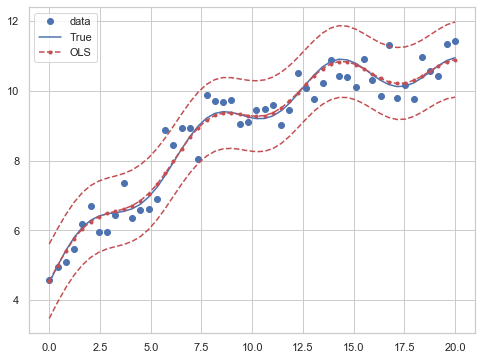

In [306]:
#wls_prediction_std –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ –∏ –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª –¥–∞–Ω–Ω—ã—Ö
prstd, iv_l, iv_u = wls_prediction_std(res)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y, 'o', label="data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, res.fittedvalues, 'r--.', label="OLS")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
ax.legend(loc='best')

# –ê/–ê  —Ç–µ—Å—Ç—ã

In [344]:
data = pd.read_csv('data_lessons/hw_aa.csv', sep = ';')

In [345]:
data.head()

Unnamed: 0                               uid  experimentVariant version  \
0           1  c4ca4238a0b923820dcc509a6f75849b                  1  v2.8.0   
1           2  c81e728d9d4c2f636f067f89cc14862c                  0  v2.9.0   
2           3  eccbc87e4b5ce2fe28308fd9f2a7baf3                  1  v2.9.0   
3           4  a87ff679a2f3e71d9181a67b7542122c                  1  v2.8.0   
4           5  e4da3b7fbbce2345d7772b0674a318d5                  1  v2.8.0   

   purchase  
0         0  
1         0  
2         0  
3         0  
4         0

In [347]:
from tqdm.auto import tqdm

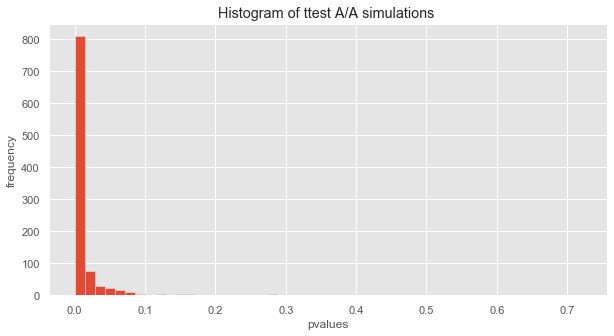

0.924

In [349]:
#p-value –¥–æ–ª–∂–µ–Ω –ø–æ–ª—É—á–∏—Ç—å—Å—è –º–µ–Ω—å—à–µ 0.05
n = 100000
simulations = 1000
n_s = 1000
res = []


# –ó–∞–ø—É—Å–∫ —Å–∏–º—É–ª—è—Ü–∏–π A/A —Ç–µ—Å—Ç–∞
for i in tqdm(range(simulations)):
    s1 = data[(data['experimentVariant'] == 1)]['purchase'].sample(n_s, replace = False).values
    s2 = data[(data['experimentVariant'] == 0)]['purchase'].sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # —Å–æ—Ö—Ä–∞–Ω—è–µ–º pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# –ü—Ä–æ–≤–µ—Ä—è–µ–º, —á—Ç–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ª–æ–∂–Ω–æ–ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã—Ö —Å–ª—É—á–∞–µ–≤ –Ω–µ –ø—Ä–µ–≤—ã—à–∞–µ—Ç –∞–ª—å—Ñ–∞
sum(np.array(res) <0.05) / simulations